In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

log_file_path = '../results/scalability-offrobot.log'

data = []
pattern = r'Configuration: {"goal": "(?P<dispositions>\d+) dispositions, (?P<conditions>\d+) activated conditions.*?Test counter: (?P<test_counter>\d+).*?Negotiation time: (?P<time>\d+\.\d+) seconds. Rounds: (?P<rounds>\d+).*?'

with open(log_file_path, 'r') as file:
    for line in file:
        match = re.search(pattern, line)
        if match:
            dispositions = int(match.group("dispositions"))
            conditions = int(match.group("conditions"))
            rounds = int(match.group("rounds")) // 2 + (int(match.group("rounds")) % 2 > 0)
            time = float(match.group("time"))
            data.append({"dispositions": dispositions, "conditions": conditions, "rounds":rounds, "negotiation_time": time})

df = pd.DataFrame(data)
df.head()

,dispositions,conditions,rounds,negotiation_time
0,25,10,3,0.177
1,25,10,3,0.233
2,25,10,2,0.081
3,25,10,2,0.110
4,25,10,2,0.112


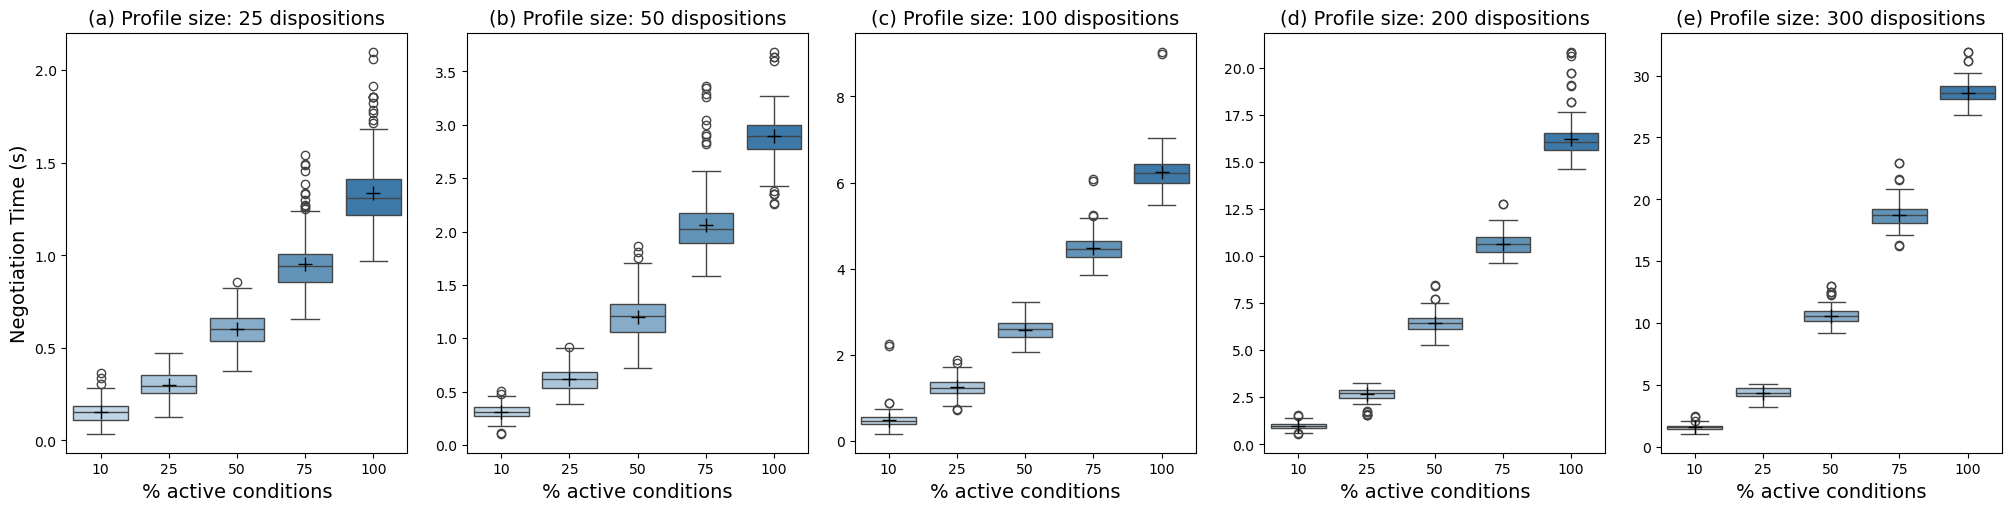

In [2]:

plotting_df = df[(df["dispositions"] != 500)]

dispositions_list = plotting_df["dispositions"].unique()
conditions_list = plotting_df["conditions"].unique()

num_dispositions = len(dispositions_list)
num_conditions = len(conditions_list)
# fig, axes = plt.subplots(2, max(num_dispositions, num_conditions), figsize=(20, 10), constrained_layout=True)
fig, axes = plt.subplots(1, max(num_dispositions, num_conditions), figsize=(20, 5), constrained_layout=True)

# First row: dispositions
chart_counter = 0
for i, dispositions in enumerate(sorted(dispositions_list)):
    # ax = axes[0, i] if i < num_dispositions else None
    ax = axes[i] if i < num_dispositions else None
    if ax:
        subset = plotting_df[plotting_df["dispositions"] == dispositions]
        sns.boxplot(data=subset, x="conditions", y="negotiation_time", ax=ax, palette="blend:#bad6eb,#2b7bba", hue="conditions", legend=False, showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"}
            )
        ax.set_title(f"({['a', 'b', 'c', 'd', 'e'][chart_counter]}) Profile size: {dispositions} dispositions", fontsize=14)
        ax.set_xlabel("% active conditions", fontsize=14)
        if i == 0:
            ax.set_ylabel("Negotiation Time (s)", fontsize=14)
        else:
            ax.set_ylabel(" ")
        chart_counter += 1
    else:
        pass

# for i, conditions in enumerate(sorted(conditions_list)):
#     ax = axes[1, i] if i < num_conditions else None
#     if ax:
#         subset = plotting_df[plotting_df["conditions"] == conditions]
#         sns.boxplot(data=subset, x="dispositions", y="negotiation_time", ax=ax, palette="blend:#bce4b5,#2c944c", hue="dispositions", legend=False, showmeans=True,
#             meanprops={"marker": "+",
#                        "markeredgecolor": "black",
#                        "markersize": "10"}
#             )
#         ax.set_title(f"\n ({['f', 'g', 'h', 'i', 'j'][chart_counter%5]}) {conditions}% active conditions", fontsize=14)
#         ax.set_xlabel("Profile size", fontsize=14)
#         if i == 0:
#             ax.set_ylabel("Negotiation Time (s)", fontsize=14)
#         else:
#             ax.set_ylabel(" ")
#         chart_counter +=1
#     else:
#         pass


In [3]:
mean_negotiation_time = plotting_df.groupby(['dispositions', 'conditions'])['negotiation_time'].mean().reset_index()

mean_negotiation_time

,dispositions,conditions,negotiation_time
0,25,10,0.153935
1,25,25,0.300440
2,25,50,0.600170
3,25,75,0.953580
4,25,100,1.338915
5,50,10,0.310225
6,50,25,0.613370
7,50,50,1.197825
8,50,75,2.062425
9,50,100,2.894940


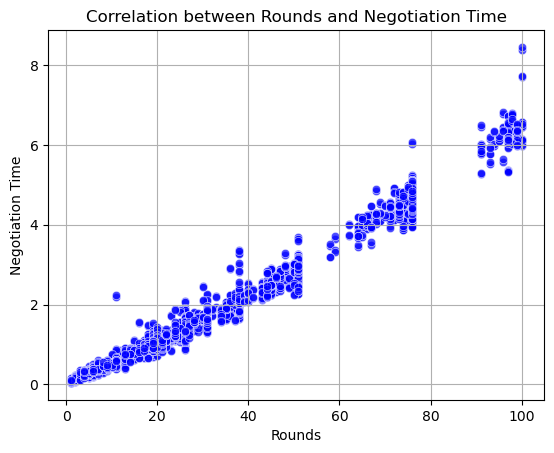

In [4]:
sns.scatterplot(data=plotting_df[(plotting_df["rounds"] <= 100) & (plotting_df["negotiation_time"] < 60)], x='rounds', y='negotiation_time', color="blue", alpha=0.7)
plt.title('Correlation between Rounds and Negotiation Time')
plt.xlabel('Rounds')
plt.ylabel('Negotiation Time')
plt.grid(True)
plt.show()

In [5]:
# Adding 'offers' column
offers_df = df[(df["dispositions"] != 500)]
offers_df['offers'] = plotting_df['dispositions'] * plotting_df['conditions'] * 0.01
offers_df

/var/folders/fw/n2pm2wss0g3294k9bwthxd6h0000gn/T/ipykernel_49050/2582411945.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offers_df['offers'] = plotting_df['dispositions'] * plotting_df['conditions'] * 0.01


,dispositions,conditions,rounds,negotiation_time,offers
0,25,10,3,0.177,2.5
1,25,10,3,0.233,2.5
2,25,10,2,0.081,2.5
3,25,10,2,0.110,2.5
4,25,10,2,0.112,2.5
...,...,...,...,...,...
4995,300,100,301,28.437,300.0
4996,300,100,301,28.271,300.0
4997,300,100,301,28.309,300.0
4998,300,100,301,27.148,300.0


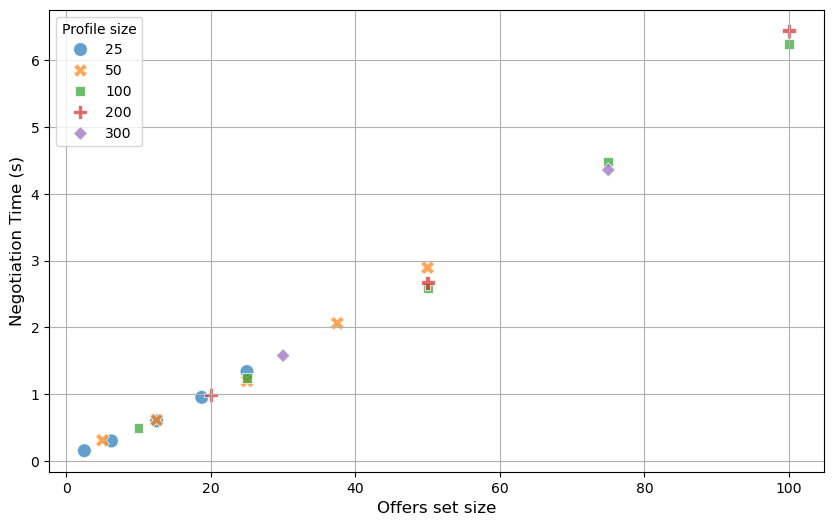

In [6]:
mean_negotiation_time = offers_df.groupby(['dispositions', 'conditions', 'offers'])['negotiation_time'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=mean_negotiation_time[(mean_negotiation_time["offers"] <= 100)], x='offers', y='negotiation_time', hue='dispositions', style='dispositions', palette='tab10', alpha=0.7, s=100)
plt.xlabel('Offers set size', fontsize=12)
plt.ylabel('Negotiation Time (s)', fontsize=12)
plt.grid(True)
plt.legend(title='Profile size')
plt.show()

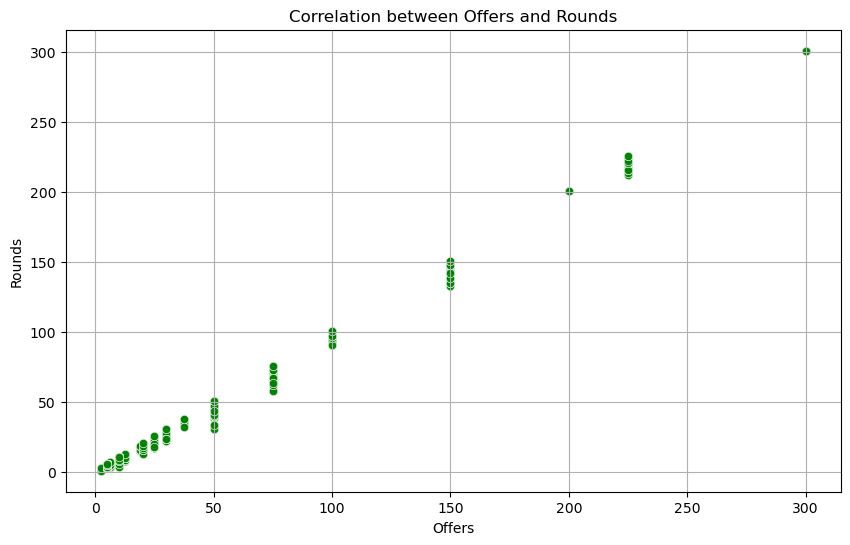

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=offers_df, x='offers', y='rounds', color="green", alpha=0.7)
plt.title('Correlation between Offers and Rounds')
plt.xlabel('Offers')
plt.ylabel('Rounds')
plt.grid(True)
plt.show()

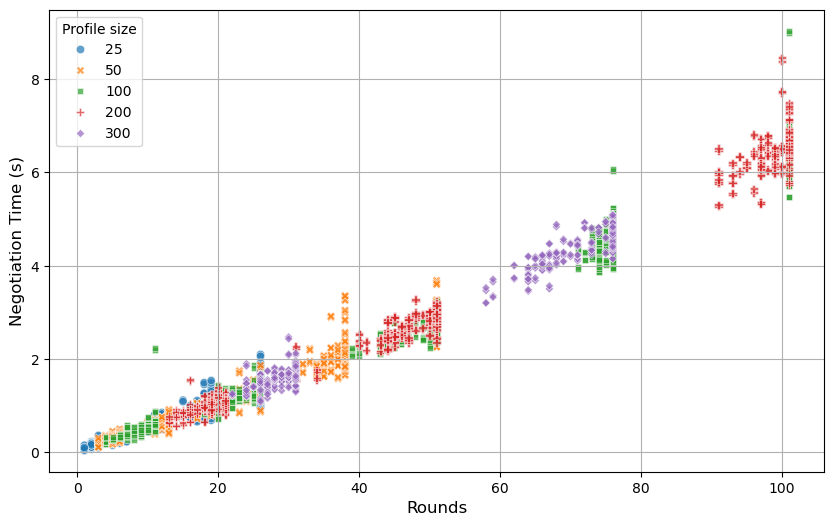

In [8]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=plotting_df[(plotting_df["rounds"] <= 101) & (plotting_df["negotiation_time"] < 60)], 
                          x='rounds', y='negotiation_time', hue='dispositions', style='dispositions', palette='tab10', alpha=0.7)
# plt.title('Correlation between Negotiation Time and Rounds colored by Dispositions')
plt.xlabel('Rounds', fontsize=12)
plt.ylabel('Negotiation Time (s)', fontsize=12)
plt.legend(title='Profile size')
plt.grid(True)
plt.show()

Runs with negotiation time <= 3 seconds: 3117 (62.34%) over 5000 runs


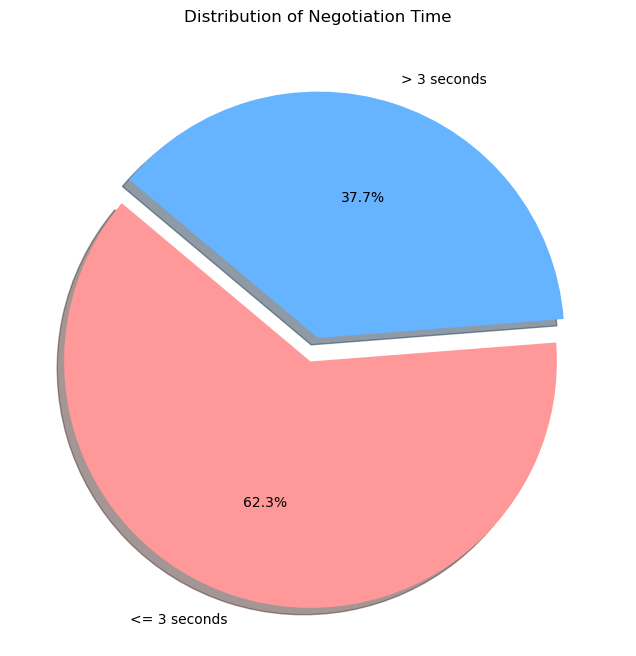

In [9]:
count_less_equal_3 = plotting_df[plotting_df['negotiation_time'] <= 3].shape[0]
count_total = plotting_df.shape[0]
count_greater_3 = count_total - count_less_equal_3

print(f"Runs with negotiation time <= 3 seconds: {count_less_equal_3} ({count_less_equal_3/count_total*100:.2f}%) over {count_total} runs")

labels = ['<= 3 seconds', '> 3 seconds']
sizes = [count_less_equal_3, count_greater_3]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Negotiation Time')
plt.show()

Runs with negotiation time <= 3 seconds: 2542 (84.73%) over 3000 runs


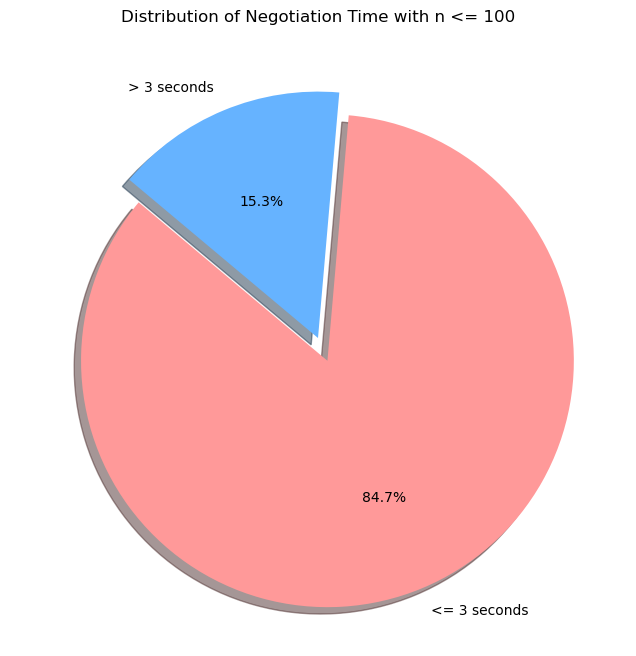

In [10]:
count_less_equal_3 = plotting_df[(plotting_df['negotiation_time'] <= 3) & (plotting_df['dispositions'] <= 100)].shape[0]
count_total = plotting_df[plotting_df['dispositions'] <= 100].shape[0]
count_greater_3 = count_total - count_less_equal_3

print(f"Runs with negotiation time <= 3 seconds: {count_less_equal_3} ({count_less_equal_3/count_total*100:.2f}%) over {count_total} runs")

labels = ['<= 3 seconds', '> 3 seconds']
sizes = [count_less_equal_3, count_greater_3]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Negotiation Time with n <= 100')
plt.show()

In [11]:
stats = df.groupby(['dispositions', 'conditions'])['negotiation_time'].describe()
stats

count       mean       std     min       25%  \
dispositions conditions                                                 
25           10          200.0   0.153935  0.053708   0.037   0.11275   
             25          200.0   0.300440  0.068185   0.126   0.25875   
             50          200.0   0.600170  0.099037   0.377   0.53475   
             75          200.0   0.953580  0.152690   0.658   0.85375   
             100         200.0   1.338915  0.191242   0.970   1.21750   
50           10          200.0   0.310225  0.063809   0.106   0.26975   
             25          200.0   0.613370  0.111302   0.382   0.53225   
             50          200.0   1.197825  0.201172   0.725   1.05450   
             75          200.0   2.062425  0.300627   1.582   1.89075   
             100         200.0   2.894940  0.224547   2.259   2.76975   
100          10          200.0   0.490200  0.213177   0.171   0.38775   
             25          200.0   1.244425  0.194206   0.723   1.12500   
             50          200.0   2.584590  0.223903   2.060   2.42075   
             75          200.0   4.484520  0.328115   3.865   4.28050   
             100         200.0   6.249525  0.413282   5.480   5.99575   
200          10          200.0   0.988745  0.167430   0.569   0.89350   
             25          200.0   2.669920  0.321512   1.544   2.47100   
             50          200.0   6.442745  0.488126   5.276   6.13975   
             75          200.0  10.625950  0.541243   9.626  10.20450   
             100         200.0  16.211025  1.012583  14.630  15.63400   
300          10          200.0   1.577930  0.220597   1.065   1.42000   
             25          200.0   4.358400  0.422390   3.204   4.09925   
             50          200.0  10.576000  0.672901   9.229  10.13650   
             75          200.0  18.723010  0.923996  16.256  18.08525   
             100         200.0  28.623760  0.846554  26.813  28.08050   
500          10          200.0   2.615875  0.290576   1.937   2.43900   
             25          200.0   8.358970  0.600003   6.625   7.99550   
             50          200.0  21.693365  0.982764  18.533  21.06625   
             75          200.0  41.191485  3.369806  35.219  39.31775   

                             50%       75%     max  
dispositions conditions                             
25           10           0.1535   0.18425   0.365  
             25           0.2955   0.35175   0.473  
             50           0.6030   0.66200   0.856  
             75           0.9400   1.00750   1.542  
             100          1.3100   1.41200   2.100  
50           10           0.3095   0.35125   0.501  
             25           0.6165   0.68725   0.922  
             50           1.2065   1.31700   1.868  
             75           2.0210   2.17825   3.361  
             100          2.8965   3.00225   3.685  
100          10           0.4750   0.56050   2.246  
             25           1.2365   1.36025   1.873  
             50           2.5945   2.75000   3.236  
             75           4.4465   4.64125   6.075  
             100          6.2180   6.42925   9.036  
200          10           0.9795   1.09325   1.559  
             25           2.7160   2.90325   3.282  
             50           6.4530   6.71850   8.457  
             75          10.6120  10.98700  12.770  
             100         16.0665  16.52575  20.843  
300          10           1.5930   1.70100   2.476  
             25           4.3840   4.71975   5.104  
             50          10.5410  10.94250  12.978  
             75          18.7160  19.20175  22.946  
             100         28.6145  29.12275  31.927  
500          10           2.6310   2.82575   3.342  
             25           8.4285   8.82775   9.464  
             50          21.7385  22.46975  23.949  
             75          40.1980  42.15450  53.242

In [12]:
total = offers_df['negotiation_time'].describe()
total

count    5000.000000
mean        5.051063
std         6.872823
min         0.037000
25%         0.819750
50%         2.023500
75%         6.170000
max        31.927000
Name: negotiation_time, dtype: float64

Degree 1 function:
 
0.08871 x - 1.074

Degree 2 function:
           2
0.0001512 x + 0.05003 x - 0.009196

Degree 3 function:
            3             2
-1.148e-07 x + 0.0002001 x + 0.04504 x + 0.07159



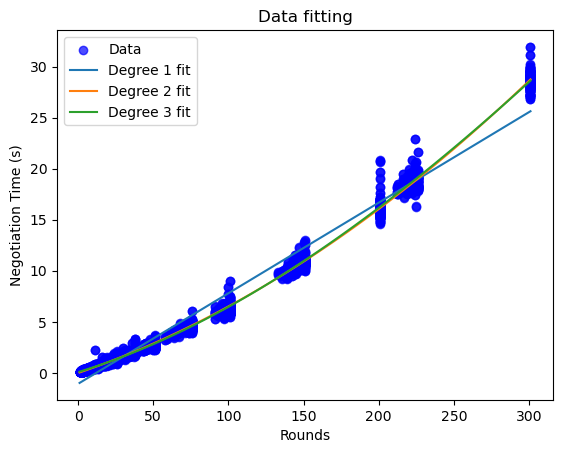

Degree 1: MSE = 1.1234, R^2 = 0.9762
Degree 2: MSE = 0.1656, R^2 = 0.9965
Degree 3: MSE = 0.1620, R^2 = 0.9966
Best fitting with grade: 3
Best degree: 3, with function:
            3             2
-1.148e-07 x + 0.0002001 x + 0.04504 x + 0.07159


In [13]:
# Trying to fit the data in a polynomial model

import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

X = offers_df["rounds"].values
y = offers_df["negotiation_time"].values

plt.scatter(X, y, label="Data", color='blue', alpha=0.7)

degrees = [1, 2, 3]
errors = {}
r2_scores = {}

# Fit
x_range = np.linspace(min(X), max(X), 100)

for deg in degrees:
    poly_func = np.poly1d(np.polyfit(X, y, deg))
    print(f"Degree {deg} function:\n{poly_func}\n")
    coeffs = np.polyfit(X, y, deg)
    poly_func = np.poly1d(coeffs)
    
    y_pred = poly_func(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    errors[deg] = mse
    r2_scores[deg] = r2
    
    # Plotting the curve
    plt.plot(x_range, poly_func(x_range), label=f'Degree {deg} fit')

plt.xlabel("Rounds")
plt.ylabel("Negotiation Time (s)")
plt.legend()
plt.title("Data fitting")
plt.show()

for deg in degrees:
    print(f"Degree {deg}: MSE = {errors[deg]:.4f}, R^2 = {r2_scores[deg]:.4f}")

# R^2 Comparison
best_degree = max(r2_scores, key=r2_scores.get)
print(f"Best fitting with grade: {best_degree}")

# Coefficients
best_coeffs = np.polyfit(X, y, best_degree)
best_poly = np.poly1d(best_coeffs)

print(f"Best degree: {best_degree}, with function:")
print(best_poly)